# Make a software package for generating train/test data

+ Utilities for combining models / directional forcing
+ 

In [62]:
# import numpy as np
# import matplotlib.pyplot as plt
# import warnings
# from numpy.random import random, seed, normal
# import glob
# import os.path

# from mpl_toolkits.mplot3d import axes3d

# import scipy

# from chaos_ensemble import *
# from utils import *

# blue, red, turquoise, purple, magenta, orange  = [[0.372549, 0.596078, 1], [1.0, .3882, .2784], 
#                                  [0.20784314, 0.67843137, 0.6], [0.59607843, 0.25882353, 0.89019608],
#                                          [0.803922, 0.0627451, 0.462745], [0.917647, 0.682353, 0.105882]]

# from sklearn.metrics import accuracy_score, balanced_accuracy_score

# %matplotlib inline
# # %matplotlib widget
# plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys

import matplotlib.pyplot as plt

sys.path.append('thom/')
from thom import *

import json
with open("thom/data/chaotic_attractors.json", "r") as file:
    dd = json.load(file)
print(len(dd.keys()))

%load_ext autoreload
%autoreload 2

95


In [ ]:
import sdepy

eqf = lambda x, t : np.vstack([eq(item, t) for item in x]).T
eqf = lambda x, t : np.array(eq(x, t))

@sdepy.integrate
def grn_process(t, x, sigma=0.1):
    return {'dt': eqf(x, t)[None, :], 'dw': sigma}

# sol = grn_process(x0=np.array(ic)[:, None], 
#                 paths=1, 
#                 steps=1000, 
#                 vshape=3)(tpts)

# sol = grn_process(x0=np.array(ic)[:, None], 
#                 paths=1, 
#                 steps=1000, 
#                 vshape=3)(tpts)

n_genes = 3
n_cells = 10
sol = grn_process(x0=np.random.random((n_genes, n_cells)) - 0.5, 
                paths=n_cells, 
                steps=1000, 
                vshape=n_genes)(fine_tvals)

In [ ]:
from thom import *
from scipy.integrate import solve_ivp

ff = SprottJerk()
f = lambda t, X : ff(X, t)
sol = solve_ivp(f, (0, 1000), np.array([0., 0.01, 0.]), method="RK45")
plt.plot(sol.y[0], sol.y[1])

## Make Lorenz Ensemble for classification

In [9]:
def generate_lorenz_ensemble(tpts0, n_samples, params, frac_perturb_param=.1, 
                             n_classes=2, frac_transient=0.1, 
                             ic_range=None,
                            random_state=0):
    """
    Generate an ensemble of trajectories with random initial conditions, labelled by different
    sets of parameters.
    
    tpts : the timesteps over which to run the simulation
    params : iterable, the starting values for the parameters
    n_samples : int, the number of different initial conditons
    n_classes : int , the number of different parameters
    frac_perturb_param : float, the amount to perturb the parameters by
    frac_transient : float, the fraction of time for the time series to settle onto the attractor
    ic_range : a starting value for the initial conditions
    random_state : int, the seed for the random number generator
    """
    np.random.seed(random_state)
    
    ntpts = len(tpts0)
    dt = tpts0[1] - tpts0[0]
    t_range = tpts0[-1] - tpts0[0]
    tpts = np.arange(tpts0[0], tpts0[0] + t_range*(1 + frac_transient), dt)
    
    num_per_class = int(n_samples/n_classes)

    all_params = list()
    all_samples = list()
    for i in range(n_classes):
    
        params_perturb = 1 + frac_perturb_param*(2*np.random.random(len(params)) - 1)
        params_prime = params*params_perturb
        all_params.append(params_prime)
    
        eq = Lorenz(*params_prime)
        
        all_samples_per_class = list()
        for j in range(num_per_class):
            ic_prime = (-8.60632853, -14.85273055,  15.53352487)*np.random.random(3)
            sol = integrate_dyn(eq, ic_prime, tpts)
            
            all_samples_per_class.append(sol[:, -ntpts:]) # remove transient
        all_samples.append(all_samples_per_class)
    
    all_samples, all_params = np.array(all_samples), np.array(all_params)
    return all_samples, all_params
    
num_samples = 120

data, labels = generate_lorenz_ensemble(np.linspace(0, 500, 125000), 2*num_samples, (10, 28, 2.5), 
                                    n_classes=8, frac_perturb_param=.2, frac_transient=.2)


In [ ]:
def add_default(a,*args):
    return Adder.__dict__['add_default'](a,*args)

add_default_fast = jit(add_default,forceobj=True)
print(add_default_fast(a,7, 8)) # 16

# Sprott family

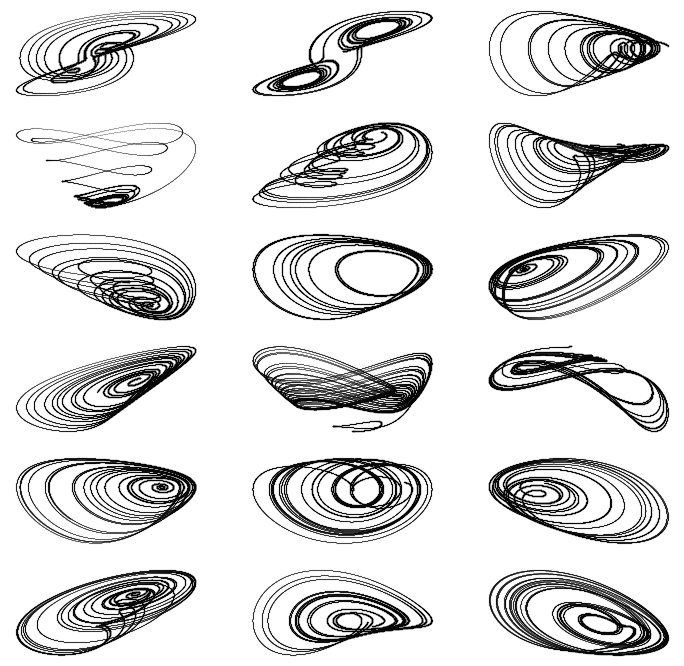

In [15]:
np.random.seed(0)
all_ensembles = list()
plt.figure(figsize=(12, 12))
for i, model in enumerate([SprottB(), SprottC(), SprottD(), SprottE(), SprottF(), SprottG(), 
              SprottH(), SprottI(), SprottJ(), SprottK(), SprottL(), SprottM(),
              SprottN(), SprottO(),SprottP(), SprottQ(), SprottR(), SprottS()]):
    
    
#     tpts = resample_timepoints(model, ic, tpts, pts_per_period=800)
    sol = model.make_trajectory(100000)
    
    plt.subplot(6, 3, i+1)
    plt.plot(sol[0], sol[1], '.k', markersize=.1)

#     ensemble = generate_ic_ensemble(model, tpts, 5, frac_perturb_param=.2)
#     all_ensembles.append(ensemble)
    
    plt.axis('off')
    
# all_ensembles = np.array(all_ensembles)
# all_ensembles.dump('all_sprott.pkl')

# Test out code

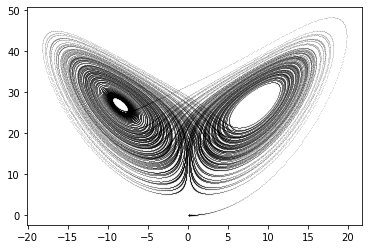

In [132]:
sol = Lorenz().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

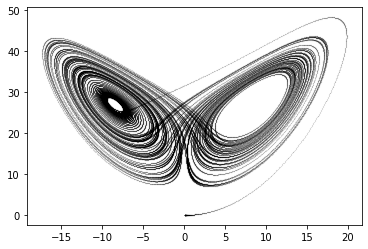

In [16]:
sol = LorenzBounded().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

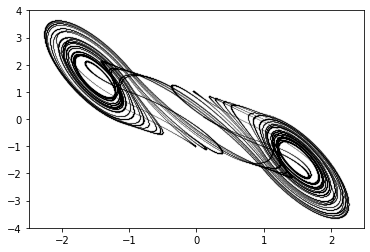

In [7]:
sol = Chua().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

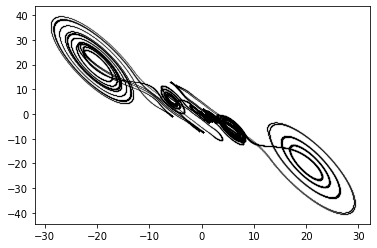

In [15]:
sol = MultiChua().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

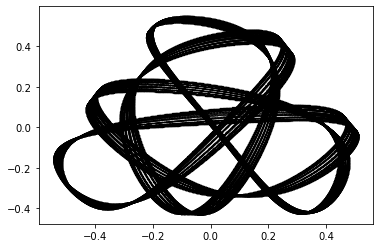

In [2]:
sol = HenonHeiles().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

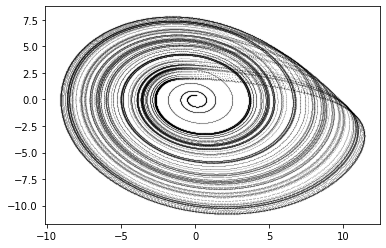

In [19]:
sol = Rossler().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

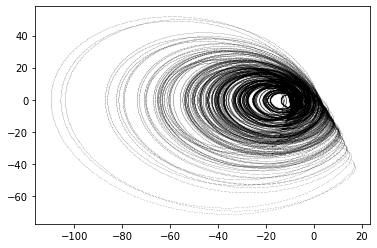

In [89]:
sol = HyperRossler().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

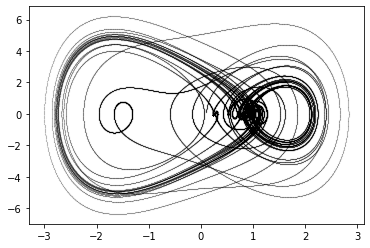

In [24]:
sol = Duffing().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

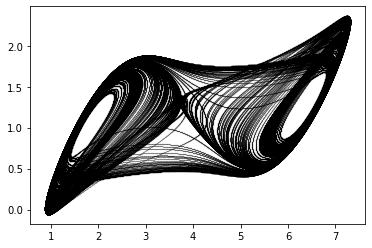

In [102]:
sol = BeerRNN().make_trajectory(1000000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

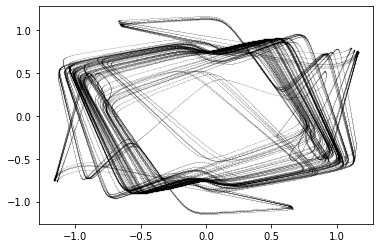

In [105]:
sol = Hopfield().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

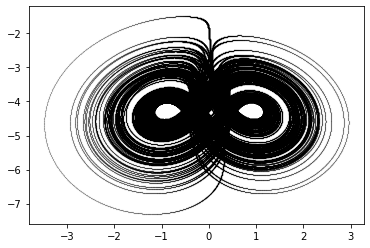

In [110]:
sol = Finance().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

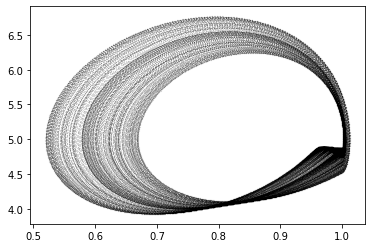

In [32]:
sol = WindmiReduced().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

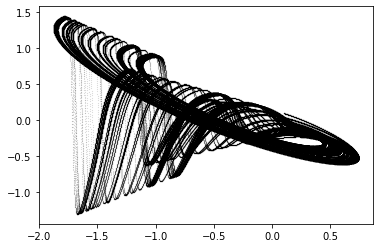

In [214]:
sol = JerkCircuit().make_trajectory(600000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

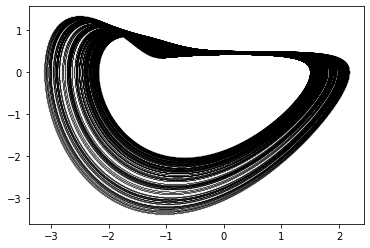

In [245]:
from thom import *
sol = SprottJerk().make_trajectory(1000000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

In [176]:
sol = SprottTorus().make_trajectory(500000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

In [120]:
sol = CellCycle().make_trajectory(1000000)

plt.plot(sol[0], sol[3], '.k', markersize=.1)

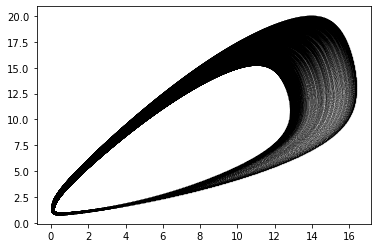

In [138]:
sol = CircadianRhythm().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

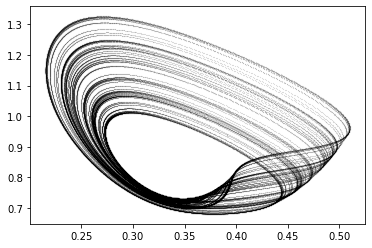

In [146]:
sol = CaTwoPlus().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

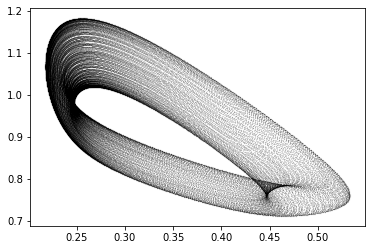

In [6]:
sol = CaTwoPlusQuasiperiodic().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [13]:
sol = Torus().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

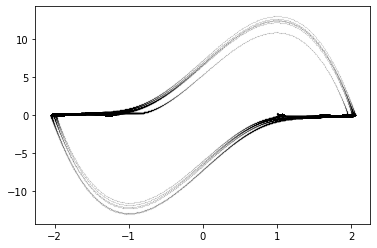

In [5]:
sol = ForcedVanDerPol().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [15]:
sol = ForcedFitzHughNagumo().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [22]:
sol = HindmarshRose().make_trajectory(500000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

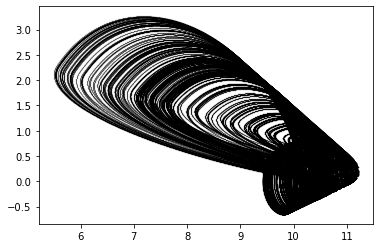

In [33]:
sol = Colpitts().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [40]:
sol = CellularNeuralNetwork().make_trajectory(200000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [4]:
sol = LorenzCoupled().make_trajectory(100000)

plt.plot(sol[0], sol[3], '.k', markersize=.1)

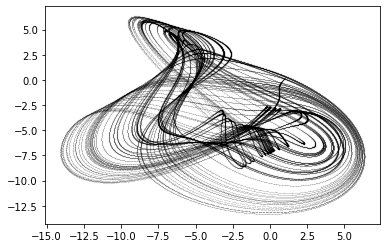

In [2]:
sol = Halvorsen().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [249]:
sol = Thomas().make_trajectory(100000)
plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [261]:
sol = ThomasLabyrinth().make_trajectory(100000)
plt.plot(sol[0], sol[1], '.k', markersize=.1)

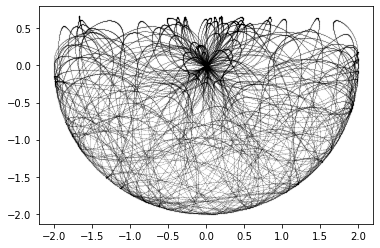

In [42]:
sol = DoublePendulum().make_trajectory(100000)

plt.plot(np.sin(sol[0]) + np.sin(sol[1]), -np.cos(sol[0]) - np.cos(sol[1]), '.k', markersize=.1)

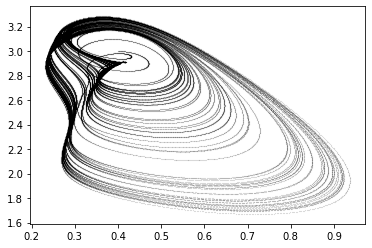

In [41]:
sol = ForcedBrusselator().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

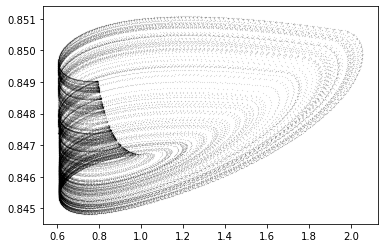

In [47]:
sol = BelousovZhabotinsky().make_trajectory(50000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

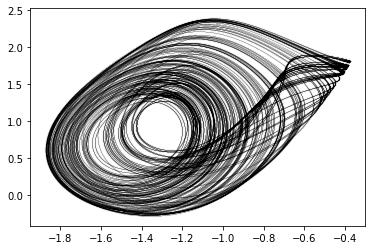

In [30]:
sol = RabinovichFabrikant().make_trajectory(400000)

plt.plot(sol[0], sol[1], '.k', markersize=.04)

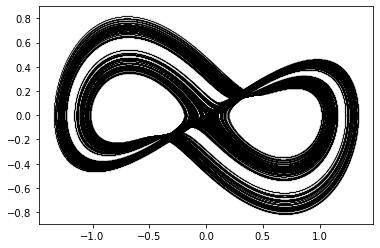

In [127]:
sol = ShimizuMorioka().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [136]:
sol = FluidTrampoline().make_trajectory(500000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

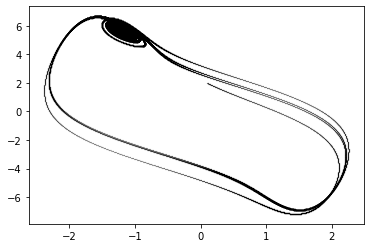

In [145]:
sol = KawczynskiStrizhak().make_trajectory(300000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [79]:
sol = CoevolvingPredatorPrey().make_trajectory(10000000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

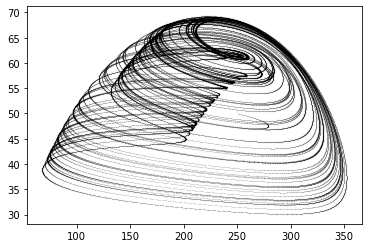

In [86]:
sol = SaltonSea().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

In [167]:
sol = Blasius().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

In [153]:
sol = TurchinHanski().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [159]:
sol = HastingsPowell().make_trajectory(300000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

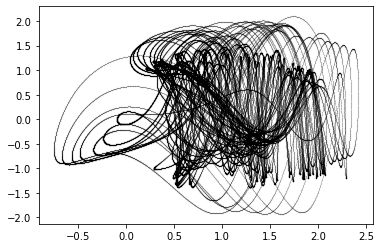

In [120]:
sol = Hadley().make_trajectory(200000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

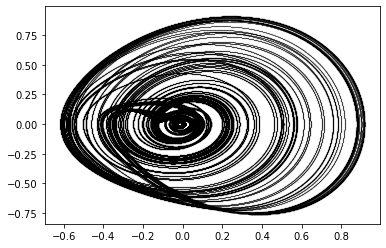

In [132]:
sol = GenesioTesi().make_trajectory(500000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

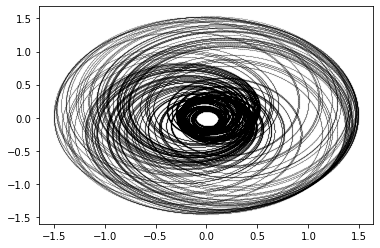

In [112]:
sol = Aizawa().make_trajectory(300000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

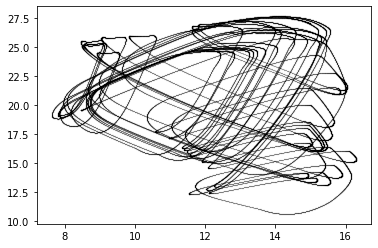

In [91]:
sol = MacArthur().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [104]:
sol = AnishchenkoAstakhov().make_trajectory(700000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [106]:
sol = NoseHoover().make_trajectory(300000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

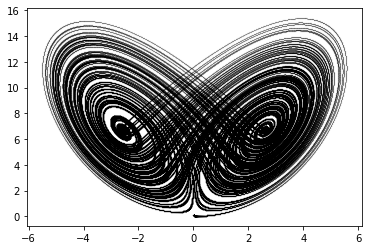

In [187]:
sol = Rucklidge().make_trajectory(600000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

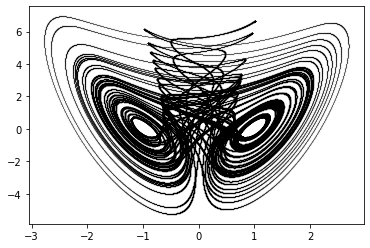

In [208]:
sol = SanUmSrisuchinwong().make_trajectory(500000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

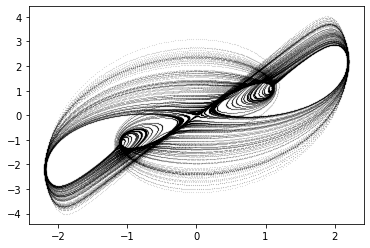

In [52]:
sol = YuWang().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

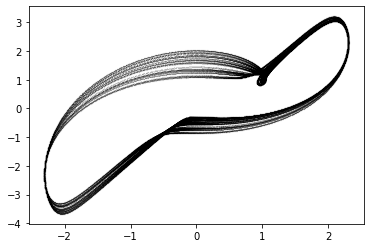

In [66]:
sol = YuWang2().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

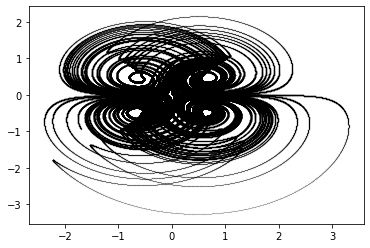

In [51]:
sol = WangSun().make_trajectory(2000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

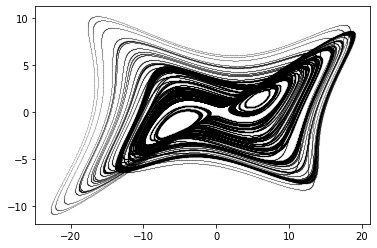

In [196]:
sol = Sakarya().make_trajectory(500000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [16]:
sol = LiuChen().make_trajectory(1000000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

In [58]:
sol = QiChen().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

In [220]:
sol = DoubleGyre().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

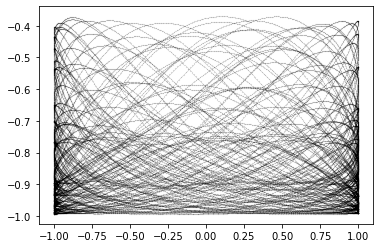

In [20]:
sol= BickleyJet().make_trajectory(100000)

plt.plot(np.sin(sol[0]), np.sin(sol[1]), '.k', markersize=.1)

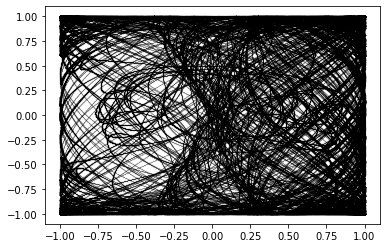

In [19]:
sol = ArnoldBeltramiChildress().make_trajectory(1000000)

plt.plot(np.sin(sol[0]), np.sin(sol[1]), '.k', markersize=.1)

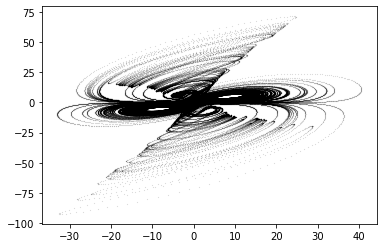

In [225]:
sol = ZhouChen().make_trajectory(300000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

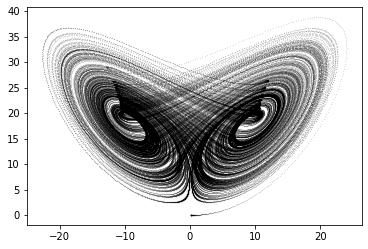

In [201]:
sol = RayleighBenard().make_trajectory(200000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

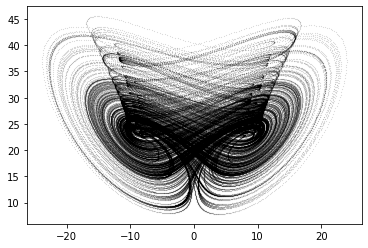

In [246]:
sol = Chen().make_trajectory(200000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

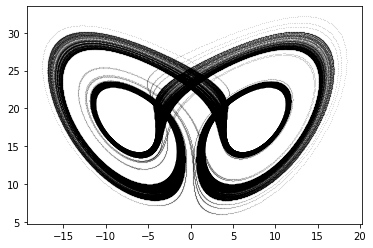

In [239]:
sol = LuChen().make_trajectory(500000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

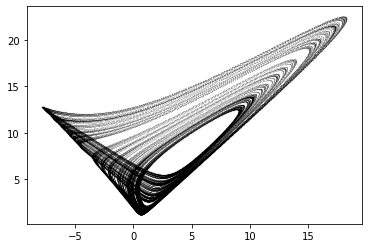

In [235]:
sol = LuChenCheng().make_trajectory(100000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

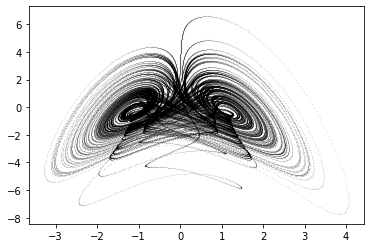

In [228]:
sol = BurkeShaw().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

In [61]:
sol = DequanLi().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

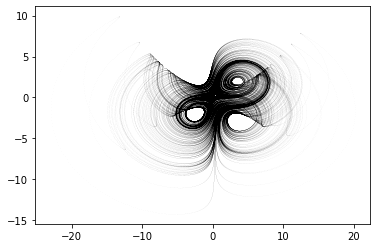

In [25]:
sol = Dadras().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.01)

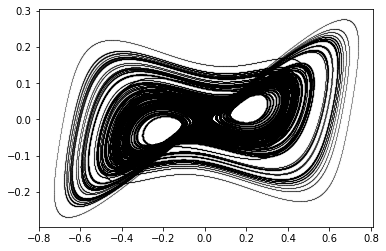

In [76]:
sol = NewtonLiepnik().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

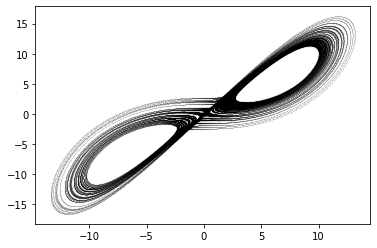

In [11]:
sol = PanXuZhou().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

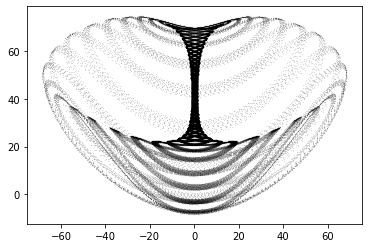

In [6]:
sol = Tsucs2().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

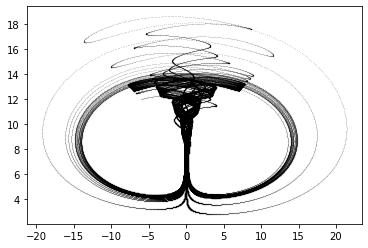

In [250]:
sol = ChenLee().make_trajectory(200000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

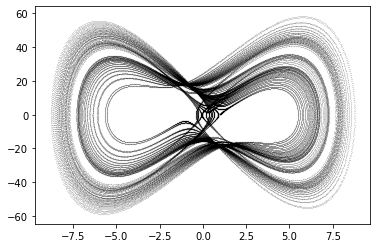

In [49]:
sol = MooreSpiegel().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

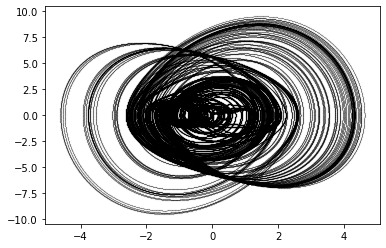

In [180]:
sol = Arneodo().make_trajectory(500000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

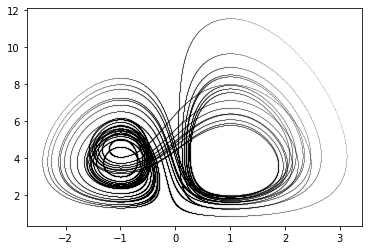

In [173]:
sol = Bouali().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

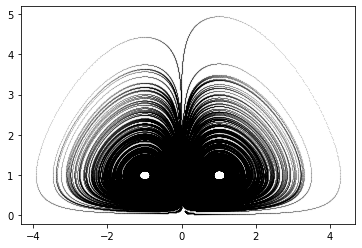

In [2]:
sol = Bouali2().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

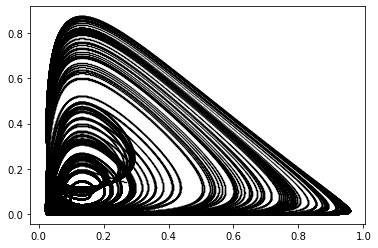

In [152]:
sol = ItikBanksTumor().make_trajectory(4000000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

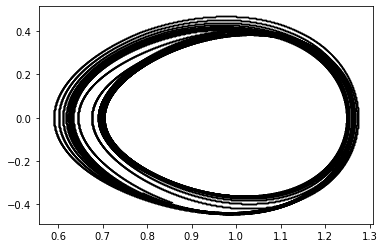

In [147]:
sol = StickSlipOscillator(gamma=1, eps=0.05).make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

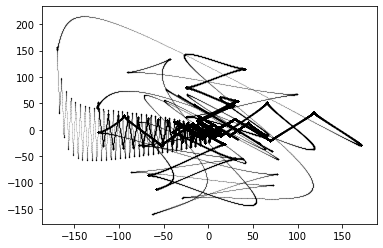

In [139]:
sol = MixMasterUniverse().make_trajectory(1000000)

plt.figure()
plt.plot(sol[3], sol[4], '.k', markersize=.1)

In [58]:
?integrate_dyn

Signature: integrate_dyn(f, ic, tvals, noise=0, use_compile=True)
Docstring:
Given the RHS of a dynamical system, integrate the system
noise > 0 requires the Python library sdeint (assumes Brownian noise)

f : callable, the right hand side of a system of ODE
ic : the initial conditions
noise_amp : the amplitude of the Langevin forcing term
use_compile : bool, whether to compile the function with numba 
    before performing integration

DEV:
scipy.integrate.solve_ivp(eq, (tpts[0], tpts[-1]), np.array(ic), 
method='DOP853', dense_output=True)
eq takes (t, X) and not vice-versa
File:      ~/program_repos/thom/thom/utils.py
Type:      function


In [147]:
import json

import thom
from thom.utils import standardize_ts, find_characteristic_timescale, freq_from_autocorr, freq_from_fft, resample_timepoints, integrate_dyn


with open("thom/data/chaotic_attractors.json", "r") as file:
    dd = json.load(file)
print(len(dd.keys()))


all_freqs = list()
all_sols = list()

for item in list(dd.keys())[:20]:
    eq = getattr(thom, item)()
    
#     sol = standardize_ts(eq.make_trajectory(50000).T).T
#     plt.plot(sol[0], sol[1], linewidth=.1)
#     plt.plot(sol[0], linewidth=1)
    

#     pts_per_period = 100
#     samp = eq.make_trajectory(10000)
#     period = eq.dt*(1/freq_from_autocorr(samp[0], 1))
#     num_periods = len(samp) // pts_per_period
#     tpts = np.linspace(0, num_periods*period, num_periods*pts_per_period)


#     sol = integrate_dyn(eq, eq.ic, tpts)
#     plt.plot(sol[0][:200], linewidth=1)
    
    try:
#         tpts = resample_timepoints(eq, eq.ic, eq.dt*np.arange(5000))
#         sol = integrate_dyn(eq, eq.ic, tpts)
        
        
#         tau = find_characteristic_timescale(sol[0])
#         tpts = eq.dt*np.arange(10000)/tau
        
        pts_per_period = 100
        samp = standardize_ts(eq.make_trajectory(10000).T).T
#         period1 = eq.dt*(1/freq_from_autocorr(samp[0], 1))
#         period2 = eq.dt*(1/freq_from_fft(samp[0], 1))
        
        dt0 = eq.dt
#         period1 = eq.dt*(1/freq_from_autocorr(samp[0], 1))
#         period2 = eq.dt*(1/freq_from_fft(samp[0], 1))
        
        
        period1 = .01*1/freq_from_autocorr(samp[0])
        period2 = .01*1/freq_from_fft(samp[0])
        
        
#         period = eq.dt*find_characteristic_timescale(samp[0])
        eq.dt = dt0*period1
        sol1 = standardize_ts(eq.make_trajectory(10000).T).T
        
        
        eq.dt = dt0*period2
        sol2 = standardize_ts(eq.make_trajectory(10000).T).T
        
        all_sols.append((sol1, sol2))
        
#         period1 = eq.dt*(1/freq_from_autocorr(sol1[0]))
#         period2 = eq.dt*(1/freq_from_fft(sol2[0]))
        all_freqs.append((freq_from_autocorr(sol1[0]), freq_from_fft(sol2[0])))
        
        
#         plt.plot(sol[0][:100], linewidth=1)
    except:
        pass
    
#     plt.loglog(find_characteristic_timescale(sol[0]), 1/freq_from_autocorr(sol[0], 1), '.')
    
    

95


In [149]:
import json

import pkg_resources
data_path = pkg_resources.resource_filename('thom', 'data/chaotic_attractors.json')

with open(data_path, "r") as read_file:
    data = json.load(read_file)

In [ ]:

with open("test.json", "w") as read_file:
    data

In [153]:
data["HenonHeiles"]["dt"]

0.01

In [25]:
find_characteristic_timescale(sol[0], k=3)

array([357.14285714, 681.81818182])

In [144]:
import json

import thom
from thom.utils import standardize_ts, find_characteristic_timescale, freq_from_autocorr, freq_from_fft, resample_timepoints, integrate_dyn


with open("thom/data/chaotic_attractors.json", "r") as file:
    dd = json.load(file)
print(len(dd.keys()))


all_freqs = list()
all_sols = list()

transient_length = 30000*10
total_length = 40000*10

for item in list(dd.keys())[:20]:
    eq = getattr(thom, item)()
    
    try:

        pts_per_period = 1000
        base_freq = 1 / pts_per_period
        sol0 = eq.make_trajectory(total_length)
        eq.ic = list(sol0[:, -1])
        sol = standardize_ts(sol0.T).T[:, -transient_length:]
        
        for i in range(5):
#             freq = freq_from_autocorr(sol[0])
#             freq = freq_from_fft(sol[0])
#             freq = 1/find_characteristic_timescale(sol[0])
            freq = np.max(find_significant_frequencies(sol[0]))
            period = base_freq / freq
            eq.dt = eq.dt * period # larger period needs larger timestep
            sol0 = eq.make_trajectory(total_length)
            eq.ic = list(sol0[:, -1])
            sol = standardize_ts(sol0.T).T[:, -transient_length:]
            print(freq, end = " ")
        print("\n")

#         period2 = .01/freq_from_autocorr(sol1[0])
#         eq.dt = eq.dt*period2
#         sol2 = standardize_ts(eq.make_trajectory(10000).T).T

        all_sols.append(sol)

#     #         period1 = eq.dt*(1/freq_from_autocorr(sol1[0]))
#     #         period2 = eq.dt*(1/freq_from_fft(sol2[0]))
#         all_freqs.append((freq_from_fft(sol1[0]), freq_from_fft(sol2[0])))


    #         plt.plot(sol[0][:100], linewidth=1)
    except:
        pass
    
#     plt.loglog(find_characteristic_timescale(sol[0]), 1/freq_from_autocorr(sol[0], 1), '.')
    
    

95
0.005086666666666666 0.0010766666666666667 0.0008666666666666666 0.00109 0.0010733333333333333 

0.002543333333333333 0.0013666666666666666 0.0010133333333333333 0.00082 0.0013033333333333334 

0.00538 0.00113 0.0008966666666666667 0.0010166666666666666 0.0011166666666666666 

0.021296666666666665 0.0013033333333333334 0.0009166666666666666 0.00136 0.0007533333333333333 

0.019953333333333333 0.0014466666666666666 0.00093 0.0009833333333333332 0.0011066666666666666 

0.004313333333333333 0.0010033333333333333 0.0009966666666666668 0.001 0.00091 

0.0021033333333333334 0.00099 0.0009866666666666667 0.0010533333333333334 0.00106 

0.0012866666666666666 0.0009266666666666667 0.00126 0.0009666666666666667 0.0014233333333333333 

0.0006666666666666666 0.00099 0.00103 0.0010133333333333333 0.00098 

0.00174 0.0007766666666666667 0.0016033333333333333 0.0008766666666666667 0.00102 

0.00159 0.0010033333333333333 0.001 0.001 0.0007033333333333334 

0.0026033333333333334 0.001006666666666666

In [ ]:
    f = rfft(windowed)

    # Find the peak and interpolate to get a more accurate peak
    i = np.argmax(abs(f))  # Just use this for less-accurate, naive version
    true_i = parabolic(np.log(abs(f)), i)[0]

    # Convert to equivalent frequency
    return fs * true_i / len(windowed)

In [126]:

from numpy.fft import rfft
from scipy.signal import blackmanharris, fftconvolve, periodogram


def surrogate_time_series(sig):
    """
    Construct a surrogate time series
    """
    
    
    
def find_significant_frequencies(sig, window=True, thresh=1.0, fs=1, n_samples=100, show=False):
    """
    Find power spectral frequencies that are significant, meaning that they are 
    overrepresented in the signal compared to shuffled copies.
    
    Parameters
    ----------
    window : bool
        whether to window the signal before taking the FFT
    thresh : float
        the number of standard deviations above mean to be significant
    fs : int
        the sampling frequency
    n_samples : int
        the number of surrogates to create
    show : bool
        show the psd of the signal and the surrogate
    
    Returns
    -------
    freqs : ndarray
        The frequencies overrated in the dataset

    """
    n = len(sig)
    halflen = n // 2
    
    if window:
        sig = sig * blackmanharris(n)
    
#     fvals, psd_sig = periodogram(sig, fs=1)
#     psd_sig = psd_sig[:halflen]/psd_sig[halflen - 1]
    psd_sig = rfft(sig)
    
    all_surr_psd = list()
    for i in range(n_samples):
        surr = np.copy(sig)
        np.random.shuffle(surr)
        if window:
            surr = surr * blackmanharris(len(surr))
#         fvals, psd_surr = periodogram(surr, fs=1)
#         psd_surr = psd_surr[:halflen]/psd_surr[halflen - 1]
            psd_surr = rfft(surr)
        all_surr_psd.append(psd_surr)
    all_surr_psd = np.array(all_surr_psd)

    surrogate_floor = np.mean(all_surr_psd, axis=0) + thresh * np.std(all_surr_psd, axis=0)
    
#     if show:
#         plt.semilogy(fs * np.arange(n) / n, psd_sig)
#         plt.semilogy(fs * np.arange(n) / n, surrogate_floor)
    
    freq_inds = np.arange(len(psd_sig))[psd_sig > surrogate_floor]
    
#     freqs = fvals[freq_inds]
    freqs = fs * freq_inds / len(sig)

    return freqs

#     # Find the peak and interpolate to get a more accurate peak
#     i = np.argmax(abs(f))  # Just use this for less-accurate, naive version
#     true_i = parabolic(np.log(abs(f)), i)[0]

#     # Convert to equivalent frequency
#     return fs * true_i / len(windowed)

np.max(find_significant_frequencies(sol[0]))

1e-05

In [ ]:

numpy.random.shuffle(np.copy(sig))

In [68]:
find_characteristic_timescale(sol[0])

array(5454.54545455)

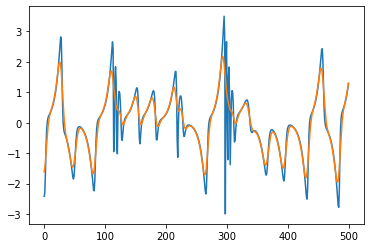

In [70]:
from scipy.ndimage import gaussian_filter1d

plt.plot(sol[0][:500])
plt.plot(gaussian_filter1d(sol[0], 3)[:500])

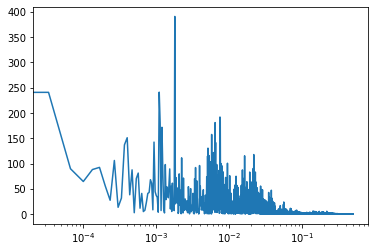

In [71]:
from scipy.signal import periodogram

fvals, psd = periodogram(sol[0], fs=1)

plt.semilogx(fvals, psd)

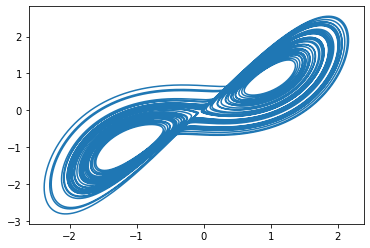

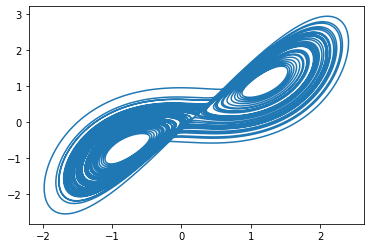

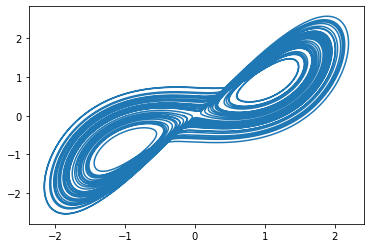

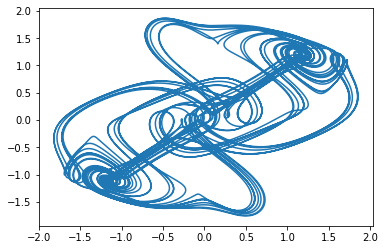

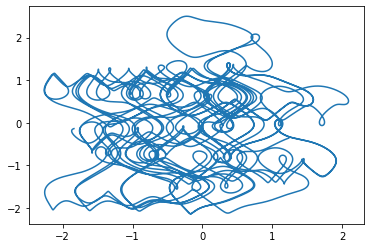

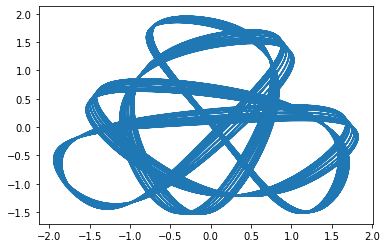

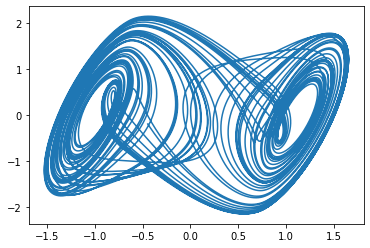

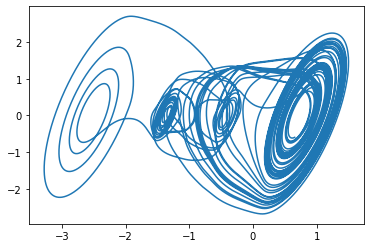

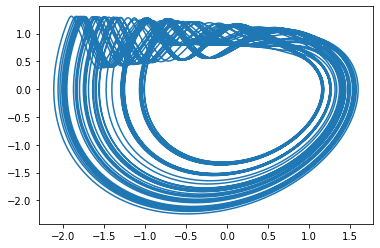

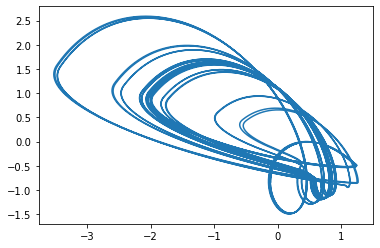

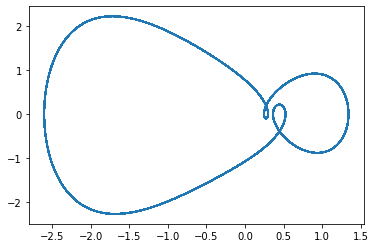

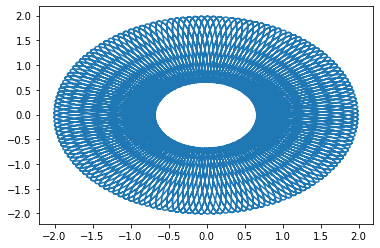

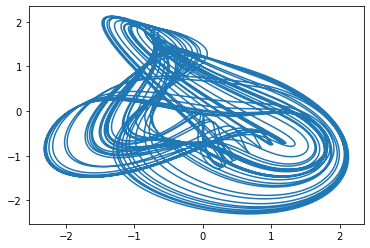

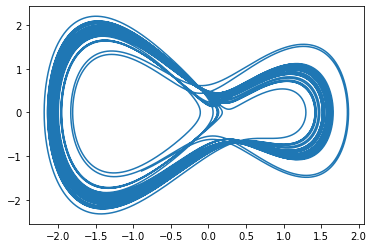

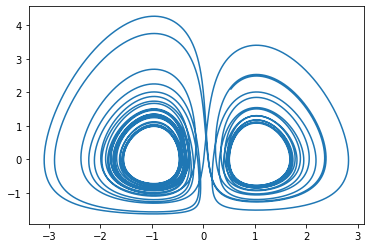

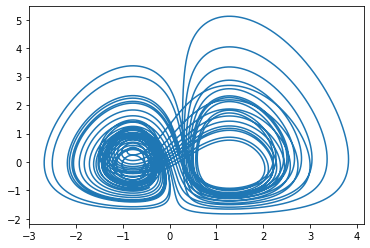

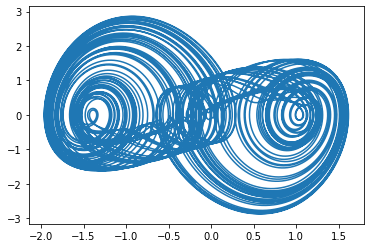

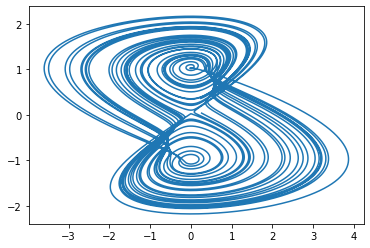

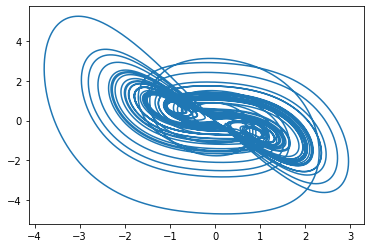

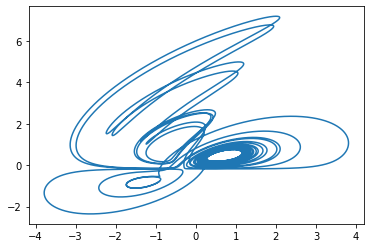

In [145]:
for item in all_sols:
    plt.figure()
    plt.plot(item[0], item[1]) 

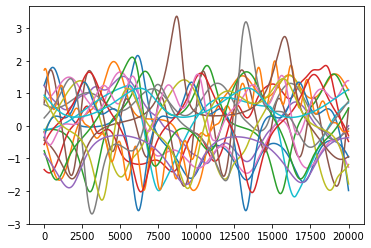

In [148]:
plt.plot(np.array([item[0] for item in all_sols])[:, :20000].T);

In [85]:
kk = 5
ee = kk

In [6]:
np.array(all_freqs)

array([[1.22296552e-03, 1.00496584e-03],
       [2.41378361e-04, 3.21922290e-03],
       [1.14796758e-02, 1.02317913e-02],
       [4.18544687e-03, 1.26583674e-02],
       [3.99241282e-02, 3.99983045e-02],
       [8.93759354e-03, 8.38478564e-03],
       [4.92990182e-05, 2.96410751e-04],
       [9.73808367e-03, 2.97500892e-02],
       [1.08076097e-02, 1.03487053e-02],
       [7.55294102e-03, 1.99916534e-02],
       [6.14630376e-04, 6.23773727e-04],
       [8.27953813e-03, 1.95673390e-02],
       [9.18682501e-03, 9.64819406e-03],
       [2.20763586e-03, 9.49125572e-03],
       [4.91883389e-05, 2.02460565e-04],
       [1.05737605e-02, 9.87299420e-02],
       [1.31007954e-02, 1.12033212e-02],
       [5.31437587e-04, 2.89411808e-04]])

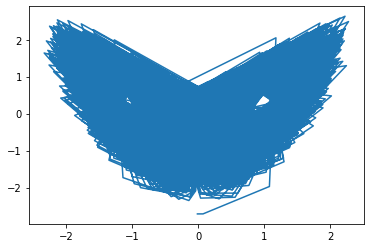

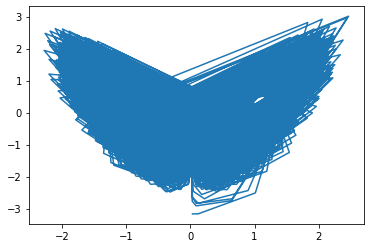

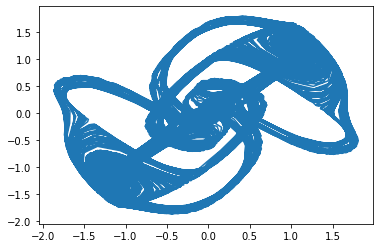

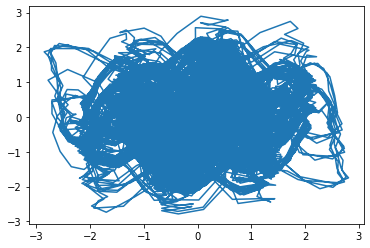

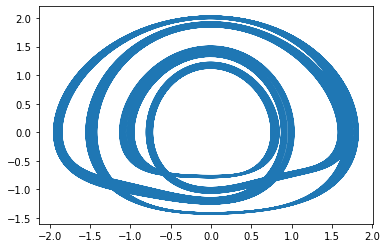

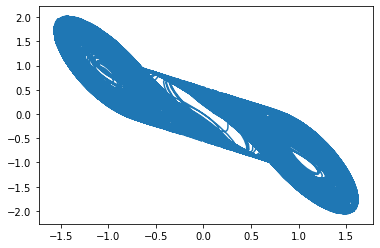

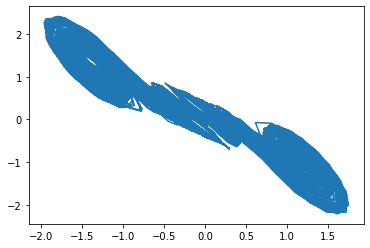

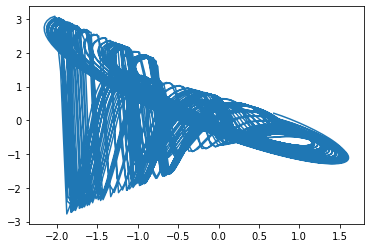

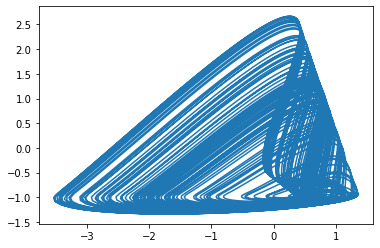

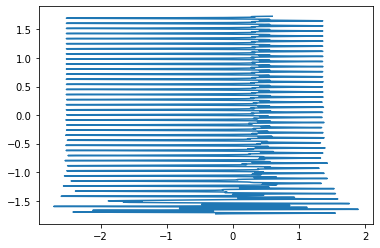

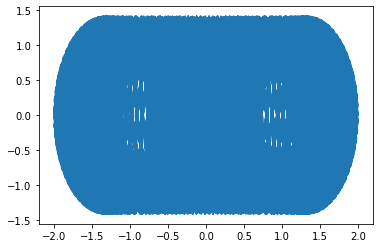

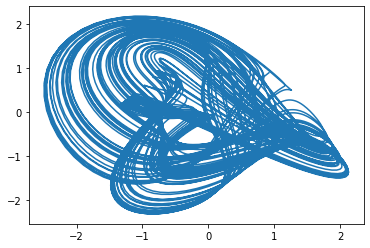

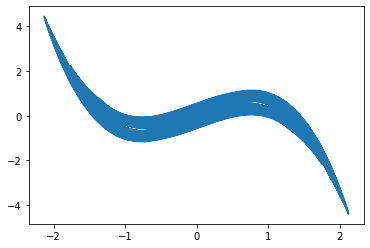

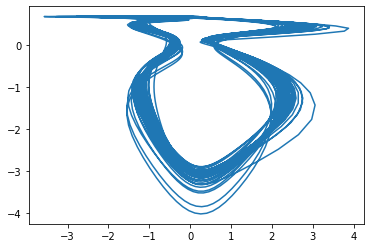

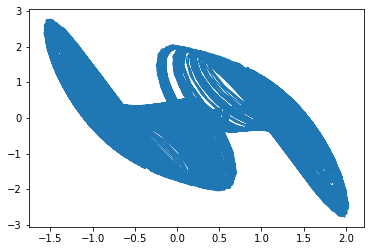

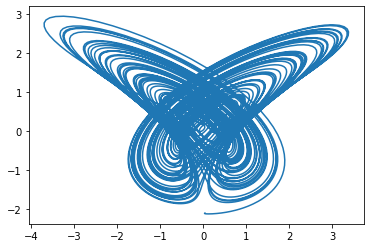

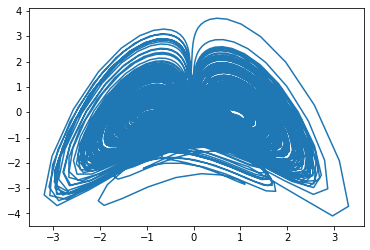

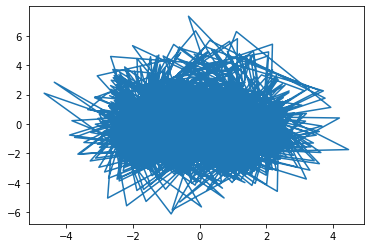

In [149]:
for item in all_sols:
    plt.figure()
    plt.plot(item[1][0], item[1][2]) 

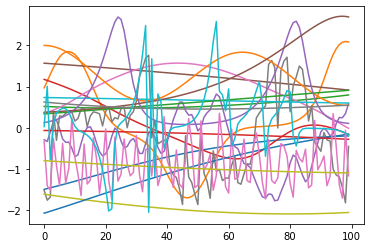

In [8]:
plt.plot(np.array([item[0] for item in all_sols])[:, :100].T);

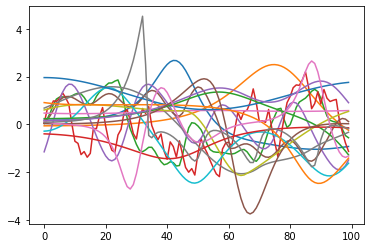

In [154]:
plt.plot(np.array([item[0][0] for item in all_sols])[:, :100].T);

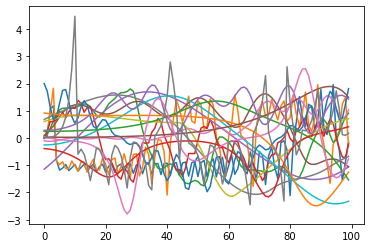

In [155]:
plt.plot(np.array([item[1][0] for item in all_sols])[:, :100].T);

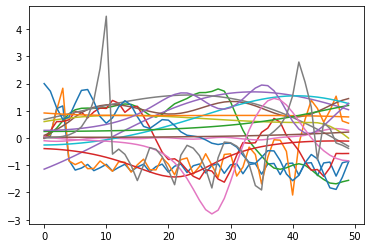

In [153]:
plt.plot(np.array([item[1][0] for item in all_sols])[:, :50].T);

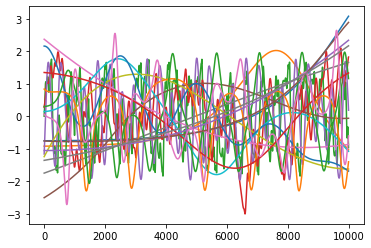

In [128]:
plt.plot(np.array([item[1][0] for item in all_sols])[:, :].T);

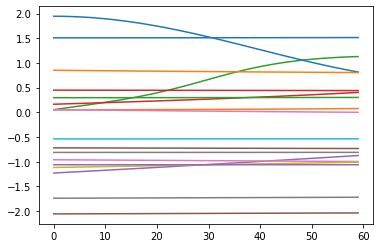

In [126]:
plt.plot(np.array([item[0][0] for item in all_sols])[:, :60].T);

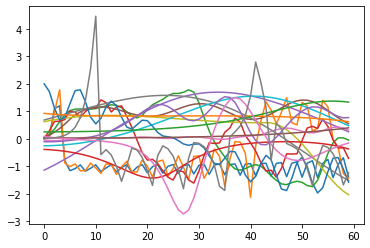

In [54]:
plt.plot(np.array([item[1][0] for item in all_sols])[:, :60].T);

In [38]:
np.array(all_sols).shape

(18, 2)

ValueError: setting an array element with a sequence.

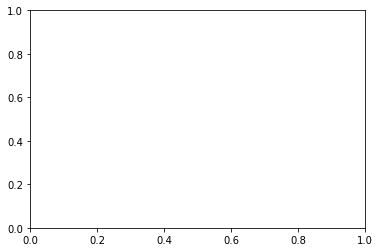

In [39]:
plt.plot(np.array(all_sols)[:, 0])

In [ ]:
plt.plot(np.array(all_sols)[:100, 1])

In [91]:
freq_from_autocorr(samp, 1)

ValueError: object too deep for desired array

In [88]:
samp

array([[ 1.00000000e-01,  1.00312441e-01,  1.00625766e-01, ...,
        -3.86703915e+00, -3.87686679e+00, -3.88672805e+00],
       [ 1.00000000e-01,  9.97004492e-02,  9.94017957e-02, ...,
        -2.07508032e+00, -2.07058296e+00, -2.06611210e+00],
       [ 0.00000000e+00, -9.95692801e-06, -1.98279876e-05, ...,
        -9.56840275e-01, -9.56466751e-01, -9.56099478e-01]])

In [37]:
?standardize_ts

Signature: standardize_ts(a, scale=1.0)
Docstring:
Standardize a T x D time series along its first dimension
For dimensions with zero variance, divide by one instead of zero
File:      ~/program_repos/thom/thom/utils.py
Type:      function


In [27]:

# insert a control function that takes the current values of all vars and adds forcing

# various functions for sampling from each system, and removing transients

# function that goes to numba

# function that couples attractors together (can use slaving to force chaos)

In [ ]:
#https://stackoverflow.com/questions/1796180/how-can-i-get-a-list-of-all-classes-within-current-module-in-python

In [182]:
import inspect
import sys
clsmembers = inspect.getmembers(sys.modules[__name__], inspect.isclass)
cls_members_narrowed = len([item[1] for item in clsmembers if item[1].__module__ == "thom"])
print(cls_members_narrowed)

91


In [114]:
np.sum(np.abs(data_rp_train[0] - data_loaded[0][0].T))
np.sum(np.abs(data_rp_train[10] - data_loaded[0][10].T))
# np.sum(np.abs(data_rp_train[13] - data_loaded[0][13].T))

# data_rp_train[33] - data_loaded[1][13]
np.sum(np.abs(data_rp_train[33] - data_loaded[1][13].T))

0.0

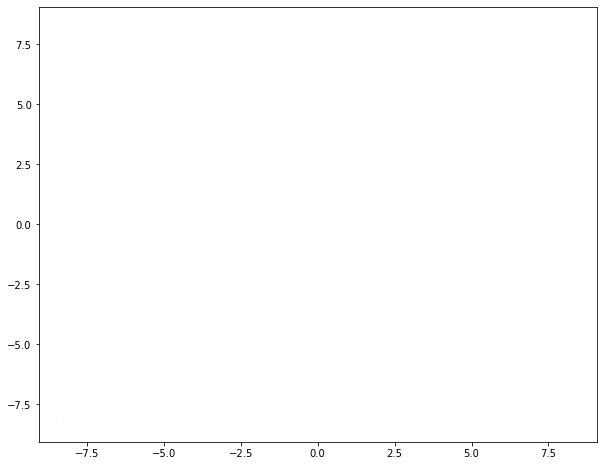

In [73]:
for i in range(10):
#     plt.plot(ee1[1, i][0, :], ee1[1, i][1, :], 'r', linewidth=.01)
    plt.plot(ee1[2, i][0, :], ee1[2, i][1, :], 'b', linewidth=.01)

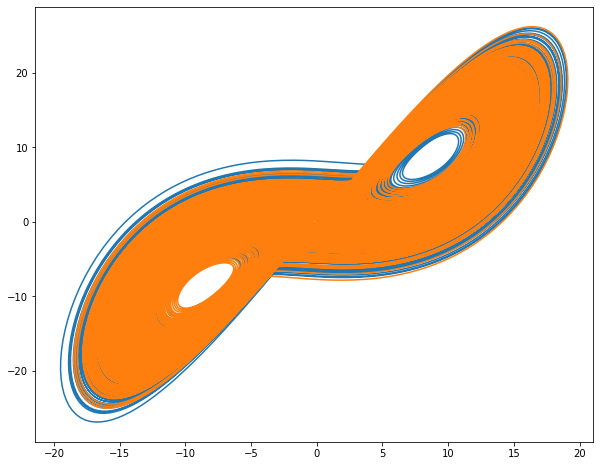

In [33]:
plt.plot(ee1[0, 1][0, :], ee1[0, 1][1, :])
plt.plot(ee1[1, 1][0, :], ee1[1, 1][1, :])

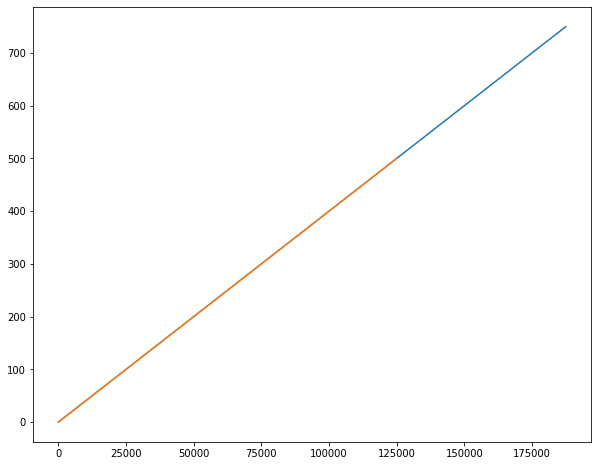

In [18]:
plt.plot(ee1)
plt.plot(np.linspace(0, 500, 125000))

In [42]:
from chaos_models import *

In [43]:
eq = Lorenz(10, 28, 2.667)
sol = eq.integrate((-8.60632853, -14.85273055,  15.53352487), np.linspace(0, 500, 125000))
sol2 = integrate_dyn(eq, (-8.60632853, -14.85273055,  15.53352487), np.linspace(0, 500, 125000))

In [46]:
%timeit integrate_dyn(eq, (-8.60632853, -14.85273055,  15.53352487), np.linspace(0, 500, 125000))
%timeit eq.integrate((-8.60632853, -14.85273055,  15.53352487), np.linspace(0, 500, 125000))

374 ms ± 3.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
381 ms ± 5.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Lorenz less data
SAMPLE_WINDOW = 5000
TRAIN_TIME = 200
eq = Lorenz(10, 28, 2.667)
sol = eq.integrate((-8.60632853, -14.85273055,  15.53352487), np.linspace(0, 500, 125000))
sol = sol[:,::10]
data = sol[0]

plt.figure()
plt.plot(sol[0], sol[1], linewidth=.1)


eq = Lorenz(9, 26, 2.5)
sol = eq.integrate((-8.60632853, -14.85273055,  15.53352487), np.linspace(0, 500, 125000))
sol = sol[:,::10]
data = sol[0]
plt.figure()
plt.plot(sol[0], sol[1], 'r', linewidth=.1)

In [47]:
eq.get_params()
# A method that returns the ODE parameters for the system

In [ ]:
## Some day have an API working

import inspect


def generate_data(model, n_samples, params, frac_perturb_param=.1, 
                             n_classes=2, frac_transient=0.1, 
                             ic_range=None,
                            random_state=0):
    """
    Generate an ensemble of trajectories with random initial conditions, labelled by different
    sets of parameters.

    model : an instantiation of a dynamical system
    tpts : the timesteps over which to run the simulation
    params : iterable, the starting values for the parameters
    n_samples : int, the number of different initial conditons
    n_classes : int , the number of different parameters
    frac_perturb_param : float, the amount to perturb the parameters by
    frac_transient : float, the fraction of time for the time series to settle onto the attractor
    ic_range : a starting value for the initial conditions
    random_state : int, the seed for the random number generator
    """

    num_per_class = int(n_samples/n_classes)

    params = inspect.getfullargspec(model.__init__).defaults # get default values of params
    
    params = model.get_params()

    param_fractional_perturb = frac_perturb*2*(np.random(len(model.default_params)) - 0.5)
    params = model.default_params*param_fractional_perturb

    mod = model(*params)
    
    
    
    
    np.random.seed(random_state)
    
    ntpts = len(tpts0)
    dt = tpts0[1] - tpts0[0]
    t_range = tpts0[-1] - tpts0[0]
    tpts = np.arange(tpts0[0], tpts0[0] + t_range*(1 + frac_transient), dt)
    
    all_params = list()
    all_samples = list()
    for i in range(n_classes):
    
        params_perturb = 1 + frac_perturb_param*(2*np.random.random(len(params)) - 1)
        params_prime = params*params_perturb
        all_params.append(params_prime)
    
        eq = Lorenz(*params_prime)
        
        all_samples_per_class = list()
        for j in range(num_per_class):
            ic_prime = (-8.60632853, -14.85273055,  15.53352487)*np.random.random(3)
            sol = integrate_dyn(eq, ic_prime, tpts)
            
            all_samples_per_class.append(sol[:, -ntpts:]) # remove transient
        all_samples.append(all_samples_per_class)
    
    all_samples, all_params = np.array(all_samples), np.array(all_params)
    return all_samples, all_params